In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-benign-or-malignant/tumor.csv


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df= pd.read_csv('../input/breast-cancer-wisconsin-benign-or-malignant/tumor.csv')

In [38]:
df.shape

(683, 11)

In [39]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [40]:
df.drop([df.columns[0]], axis= 1, inplace= True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [42]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [43]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

<AxesSubplot:>

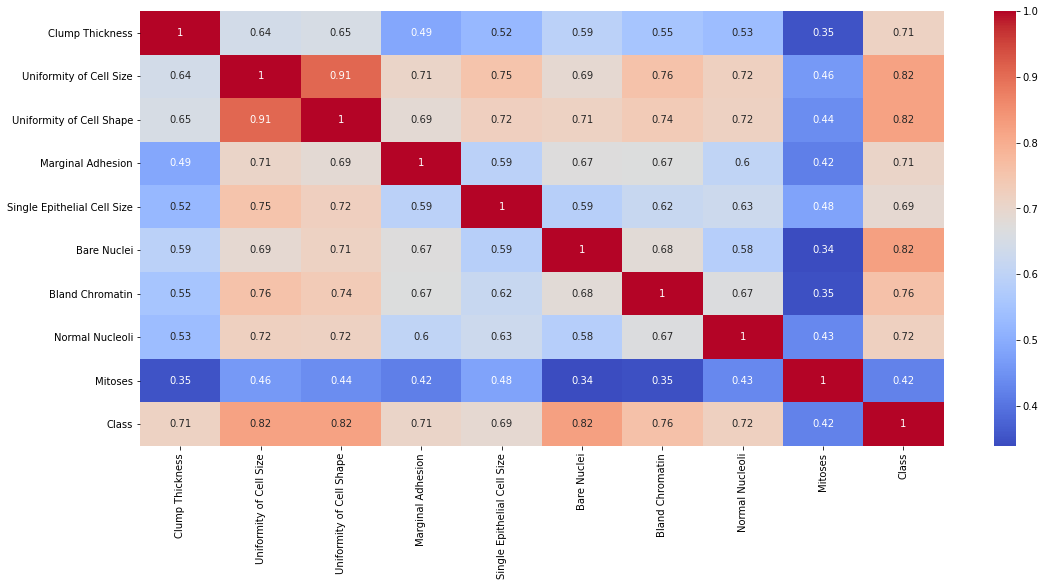

In [44]:
plt.figure(figsize=[18,8])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

In [45]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<3:
        print(a)

Clump Thickness 10
Uniformity of Cell Size 10
Uniformity of Cell Shape 10
Marginal Adhesion 10
Single Epithelial Cell Size 10
Bare Nuclei 10
Bland Chromatin 10
Normal Nucleoli 10
Mitoses 9
Class 2
[2 4]


In [46]:
df['Class'].loc[df['Class'] == 2] = 0
df['Class'].loc[df['Class'] == 4] = 1

In [47]:
x = df.drop(['Class'],axis=1)
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [48]:
y=df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(x_train,y_train)
y_pred = clf_log.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9562043795620438


In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
y_pred1 = clf_knn.predict(x_test)


print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

Accuracy Score of KNN: 0.948905109489051


In [53]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train,y_train)
y_pred2 = clf_svc.predict(x_test)

print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

Accuracy Score of SVC: 0.948905109489051


In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_dtc.fit(x_train,y_train)
y_pred3 = clf_dtc.predict(x_test)

print("Accuracy Score of decision tree:",accuracy_score(y_test,y_pred3))

Accuracy Score of decision tree: 0.9635036496350365


In [55]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc.fit(x_train, y_train)
y_pred4 = clf_rfc.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.948905109489051


In [56]:
#as we can see decision tree classifier gave us the best accuracy among all


In [57]:
input = np.array([[6,7,4,1,2,2,5,1,1]])
clf_dtc.predict(input)

array([1])

In [58]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred3})
output.head()

,Real_class,Predicted_class
292,1,1
145,1,1
211,0,0
118,0,0
302,0,0


In [59]:
output.to_csv('breast_cancer.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
